<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

# <center><b>Decision Tree Assignment Solution</b></center>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)
  - **7.2** [**Feature Scaling**](#Section72)
  - **7.3** [**Data Preparation**](#Section73)

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---

- Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan..

-  The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

- To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

  - Try to create a model that will help to predict whether a loan would be approved or not.

---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to classify and predict whether or not the borrower paid back their loan in full.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.3 MB/s eta 0:00:00


<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from ydata_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                                    # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part
from sklearn.model_selection import cross_val_score                               # Importing cross validation score from model selection
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier                                   # Loading decision tree classifier from tree
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                                # For precision and recall metric estimation
from sklearn.metrics import classification_report                                 # To generate complete report of evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay                                  # To plot confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by lending club and its description is shown below in the table.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 614 | 13 | 733 KB |

</br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**Loan_ID**|Unique Loan ID|
|02|**Gender**|Male/Female|
|03|**Married**|	Applicant married(Y/N) |
|04|**Dependents**|Number of dependents|
|05|**Education**|Applicant education(Graduate/Not Graduate)|
|06|**Self_Employed**| Applicant Self-employed or not|
|07|**ApplicantIncome**|Applicant Income|
|08|**CoapplicantIncome**|Coapplicant Income|
|09|**LoanAmount**|Loan Amount in thousands|
|10|**Loan_Amount_Term**|Term of loan in months|
|11|**Credit_History**|Does credit history meet guidelines|
|12|**Property_Area**|Urban/Semi urban/Rural|
|13|**Loan_Status**|Loan Approved (Y/N)|



In [3]:
data = pd.read_csv('https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%205%20ML2/loan_prediction.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Observations:**


<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [5]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
data['Dependents'] = data['Dependents'].replace(['3+'], '3')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observation:**

- We can observe that there is **no null data present** and all the **features** have **correct data types**.

In [8]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [9]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 24.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**


**Peforming Cleaning Operations**

---
**<h4>Question 1:** Create a function that **imputes** the missing value replacing with "**mean**" and "**mode**" values.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `.fillna(df[col])`.

</details>

In [ ]:
def impute_missing(data=None):
  # Filling the missing values of feature with the median.
  data.fillna({'Gender': data['Gender'].mode()[0],'Married':data['Married'].mode()[0], 'Dependents': data['Dependents'].mode()[0],'Self_Employed': data['Self_Employed'].mode()[0],'LoanAmount': data['LoanAmount'].mean(),'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0],'Credit_History': data['Credit_History'].mode()[0]}, inplace=True)
  return data.isna().sum()

In [ ]:
impute_missing(data=data)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

---
**<h4>Question 2:** Create a function that transform Dependents to correct data type.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use pandas .as_type() functionality to handle inconsistent data types.

</details>

In [ ]:
def CorrectType(feature=None, type=None):
  data[feature] = data[feature].astype(type)

In [ ]:
CorrectType(feature='Dependents', type=int)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 3:** Create a function that generate distribution of our target feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can plot the barplot/pieplot.

</details>

In [ ]:
def plot_target():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))
  # Plot a pieplot for Loan_Status features..
  data['Loan_Status'].value_counts().plot(kind='pie', cmap='Accent')
  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.xlabel(xlabel='Y=yes N=No', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Loan status', size=16)

  # Put a grid
  plt.grid(True)

  # Display the plot
  plt.show()

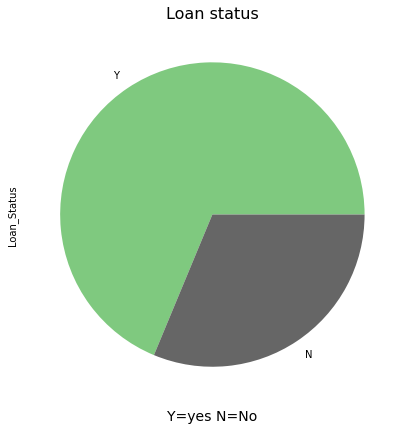

In [ ]:
plot_target()

---
**<h4>Question 4:** Create a function that shows association between loan status and education feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can plot the barplot and plot frequencies of categories using seaborn countplot function.

- You can use hue parameter for the loan status feature and add some cosmetics to make you graph look better.

</details>

In [ ]:
def Educationimpact():
  # Initiating a figure size of 15 X 7 inches
  plt.figure(figsize=(15, 7))

  # Plot histogram using seaborn api
  sns.countplot(x='Education', hue='Loan_Status', data=data, palette='Set2')
  plt.legend(labels=['Loan approved', 'Loan rejected'])

  # Add some cosmetics
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel='Education', size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Education vs Loan_Status', size=16)
  plt.grid(True)

  # Display the figure
  plt.show()

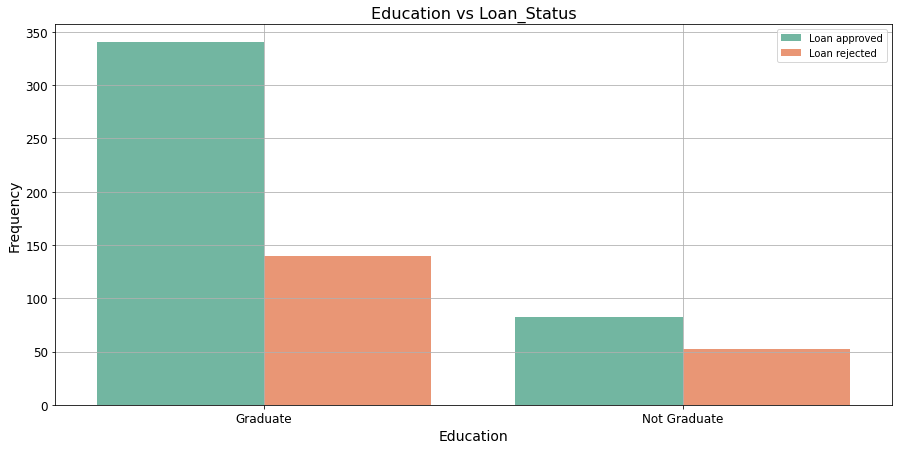

In [ ]:
Educationimpact()

---
**<h4>Question 5:** Create a function that generate distribution of loan amount feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Plot a **10x7** inches figure

- Plot a **distplot/histplot** for the `loan amount` variable.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [ ]:
def plot_amount():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a dist plot on LoanAmount using sns.histplot
  sns.histplot(x = (data['LoanAmount']))

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.xlabel(xlabel='Amount', size=14)
  plt.ylabel(ylabel='Customers', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Loan Amount', size=16)

  # Put a grid
  plt.grid(True)

  # Display the plot
  plt.show()

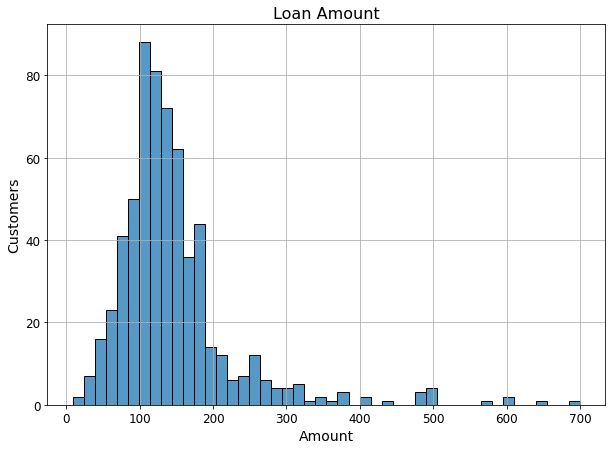

In [ ]:
plot_amount()

<a name = Section7></a>

---
# **7. Post Data Processing**
---


In [ ]:
def drop_vars(data=None):
  # Drop the mentioned columns
  data= data.drop(data[['Loan_ID']], axis=1)

  # Return the modified dataframe
  return data

In [ ]:
data = drop_vars(data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


<a name = Section71></a>
### **7.1 Feature Encoding**

---
**<h4>Question 7:** Create a function that performs one hot encoding over the categorical feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use pandas .get_dummies() functionality to achieve the asked objective.

</details>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [ ]:
def dummy_df_creator(data=None):
  # Create a dummy variable for vehicle_type
  dummies = pd.get_dummies(data=data, columns=['Gender','Married', 'Education','Self_Employed','Property_Area','Loan_Status'], drop_first=True)

  # Return the dummy variable
  return dummies

In [ ]:
data = dummy_df_creator(data=data)

<a name = Section72></a>
### **7.2 Feature Scaling**

---
**<h4>Question 7:** Create a function that performs standard scaling over the following set of features.</h4>

> int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util

---

<details>

**<summary>Hint:</summary>**

- Initialize data as input and output form.

- Initialize a list of features that needs to be scaled.

- Create a function that performs standard scaling over the features and returns a scaled dataframe.

</details>

In [ ]:
# Split the data into input and output
X = data.drop(labels=['Loan_Status_Y'], axis=1)
y = data['Loan_Status_Y']

# Initialize a list of scaled features
scalerlabels = ['ApplicantIncome','CoapplicantIncome'	,'LoanAmount'	]

In [ ]:
def dataScaler(data=None, labels=None):
  scaler = StandardScaler()
  Xtrans = scaler.fit_transform(data[labels])
  scaledframe = pd.DataFrame(data=Xtrans, columns=labels)
  return scaledframe

In [ ]:
X_scaled = dataScaler(data=data, labels=scalerlabels)
X_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,-0.554487,0.000000
1,-0.134412,-0.038732,-0.219273
2,-0.393747,-0.554487,-0.957641
3,-0.462062,0.251980,-0.314547
4,0.097728,-0.554487,-0.064454


In [ ]:
def concatFrames():
  final_data = pd.concat(objs=[X_scaled,
                               X.drop(labels=scalerlabels,
                                      axis=1)],
                         axis=1)
  return final_data

In [ ]:
final_data = concatFrames()
final_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,0.000000,0,360.0,1.0,1,0,0,0,0,1
1,-0.134412,-0.038732,-0.219273,1,360.0,1.0,1,1,0,0,0,0
2,-0.393747,-0.554487,-0.957641,0,360.0,1.0,1,1,0,1,0,1
3,-0.462062,0.251980,-0.314547,0,360.0,1.0,1,1,1,0,0,1
4,0.097728,-0.554487,-0.064454,0,360.0,1.0,1,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Education_Not Graduate   614 non-null    uint8  
 9   Self_Employed_Yes        614 non-null    uint8  
 10  Property_Area_Semiurban  614 non-null    uint8  
 11  Property_Area_Urban      614 non-null    uint8  
 12  Loan_Status_Y            614 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 33.1 KB


In [ ]:
data['Loan_Status_Y'].value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [ ]:
def data_prep(input=None, output=None):
  X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42, stratify=output)
  return X_train,X_test,y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = data_prep(input=final_data, output=y)

<a name = Section73></a>
### **7.3 Data Preparation**

---
**<h4>Question 8:** Create a function that prepare the data according to the following model requirements.</h4>

- **Split** the data into **80:20** inside train_test_split.

- Make sure to set the **random_state = 42**.

---

<details>

**<summary>Hint:</summary>**

- You can use .train_test_split functionality of sklearn package to achieve the objective.

</details>

In [ ]:
def data_prep(input=None, output=None):
  X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42, stratify=output)
  return X_train,X_test,y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = data_prep(input=data, output=y)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, you will develop decision tree-based model.

- Then **analyze the results** obtained and **make observations**.

- For **evaluation purposes** we will **focus** on the **precision and recall score**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.

---
**<h4>Question 9:** Create a function that develops decision tree model and output a confusion matrix.</h4>

---

<details>

**<summary>Hint:</summary>**

- To train decision tree model you can use sklearn package.

- Plot a side by side figure of confusion matrix using some beautiful cosmetics.

- You can use confusion_matrix function to generate a confusion maxtrix.

- Display the results.

</details>

In [ ]:
def trainDecisionGetConfusion():
  clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
  clf.fit(X_train, y_train)
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
  ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train,values_format='.5g',cmap='viridis', ax=ax1)
  ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,values_format='.5g',cmap='viridis', ax=ax2)
  ax1.set_title(label='Train Data', size=14)
  ax2.set_title(label='Test Data', size=14)
  ax1.grid(False)
  ax2.grid(False)
  plt.suptitle(t='Confusion Matrix', size=16)
  plt.show()

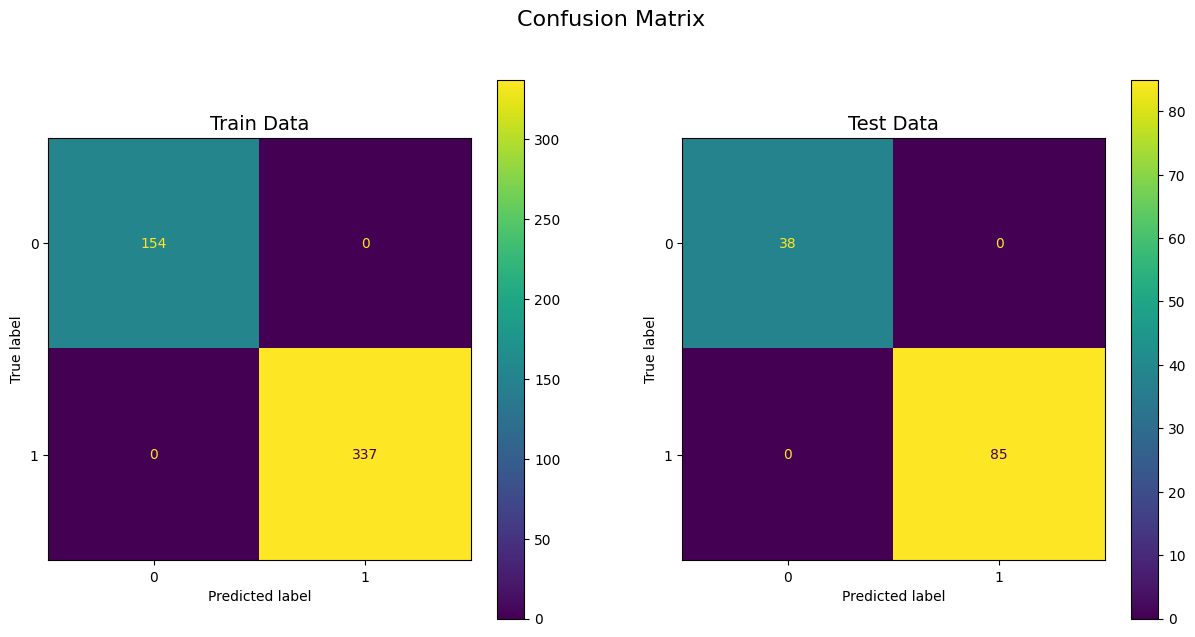

In [ ]:
trainDecisionGetConfusion()

**Observation:**

- **Train Data:**
  - Model predicted **154 instances correctly** for **negative class** while **337 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **38 instances correctly** for **negative class** while **85 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** it **was positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

---
**<h4>Question 10:** Create a function that generates a classification report using the decision tree classifier developed above.</h4>

---

<details>

**<summary>Hint:</summary>**

- To train decision tree model you can use sklearn package.

- Fit the data on training data and then predict on both train set and test set.

- Plot a side by side figure of confusion matrix using some beautiful cosmetics.

- Display the results.

</details>

In [ ]:
def getDecisionReport():
  clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
  clf.fit(X_train, y_train)

  # Predicting training and testing labels
  y_train_pred_count = clf.predict(X_train)
  y_test_pred_count = clf.predict(X_test)

  train_report = classification_report(y_train, y_train_pred_count)
  test_report = classification_report(y_test, y_test_pred_count)
  print('                    Training Report          ')
  print(train_report)
  print('                    Testing Report           ')
  print(test_report)

In [ ]:
getDecisionReport()

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

                    Testing Report           
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        85

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



**Observation:**

- We can observe that **training results** are **too good** to be true. This is called **overfitting**.

- On the test data report we can see that **class 0** is **performing well** as well as **class 1**.

- Moreover, this **data** also **suffers** from **undersampling of minority class**.

- To **overcome** this problem you can perform **cross validation** or **SMOTE technique**.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed different features** and understood their nature and distribution.

- We performed **dummification** and **scaled** our **data** so that it can't affect our model outcome.

- We split the data in a **stratified** fashion and develop a decision tree model.

- We observed that the **results** obtained were **too good to be true** for training and test data.

- This happened due to the **overfitting** of data over the model.

- We also observed that results on the test set were not good because we have **undersampled data**.

- To solve the issue one either use **cross-validation** or **SMOTE** technique or perform **hyperparameter optimization**.
